# Librerías importantes para el análisis de datos en Python

------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------




En este notebook, introduciremos algunas librerías que usaremos en el resto del módulo.

El comienzo habitual de cualquier scrip de python es una lista de declaraciones de 'import'. En la mayoría del material se utilizarán los siguientes módulos:

* numpy: Librería básica de cálculo científico. 
* csv: Usado como entrada y salida de datos usando archivos con valores separados por comas, uno de los formatos estándares en el análisis de datos. 
* matplotlib: Usado para mostrar figuras y gráficos.
* sklearn: Scikit-learn es una librería muy utilizada en machine learning con python. 

In [3]:
%matplotlib inline
## Para visualizar gráficas en el notebook, se puede eliminar si ejecutas el script desde un editor externo.
    
import numpy as np
import csv
import scipy.io       # Para leer archivos de matlab
import pandas as pd   # Para leer tablas de datos de archivos csv

# Para realizar gráficas de los resultados
import matplotlib                 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import pylab

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Tamaño por defecto de la figuras
pylab.rcParams['figure.figsize'] = 9, 6 

## 1. Uso de la librería Matplotlib y visualización de datos

Un paso importante en el análisis de datos es la visualización de los mismos. En python, la librería más simple para realizar figuras es _matplotlib_ y su sintaxis es parecida a la de Matlab. En el siguiente ejemplo, dibujamos dos sinusoides con diferentes símbolos. 

En este apartado usaremos [_subplots_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

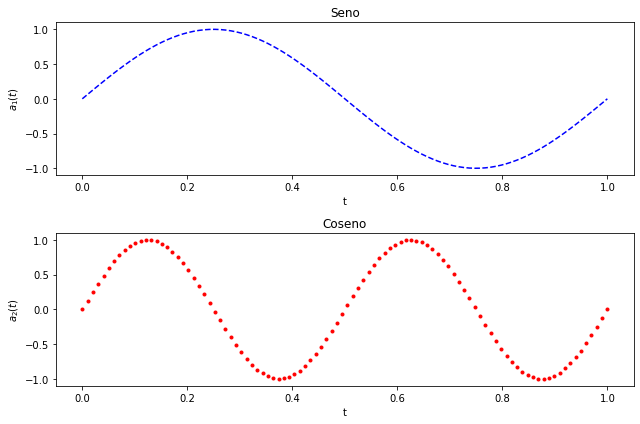

In [4]:
t = np.arange(0.0, 1.0, 0.05) #del 0 al 1 cada 0.05
t = np.linspace(0.0, 1.0, 100)
a1 = np.sin(2*np.pi*t)
a2 = np.sin(4*np.pi*t)


plt.figure()

ax1 = plt.subplot(211) #gráfica de arriba en la matriz de 2 x 1
ax1.plot(t,a1, 'b--')
ax1.title.set_text('Seno')
plt.xlabel('t')
plt.ylabel('$a_1(t)$')

ax2 = plt.subplot(212) #si le pongo plt.subplot(211) me la pinta encima
ax2.plot(t,a2, 'r.')
ax2.title.set_text('Coseno')
plt.xlabel('t')

plt.tight_layout() #para que se vea bien ajustadas las gráficas
plt.ylabel('$a_2(t)$')
plt.show()

Otra forma de hacer varias subplots es de la forma que sigue.
Para escoger el tipo de marcador, color y opciones [**Aquí**](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle)

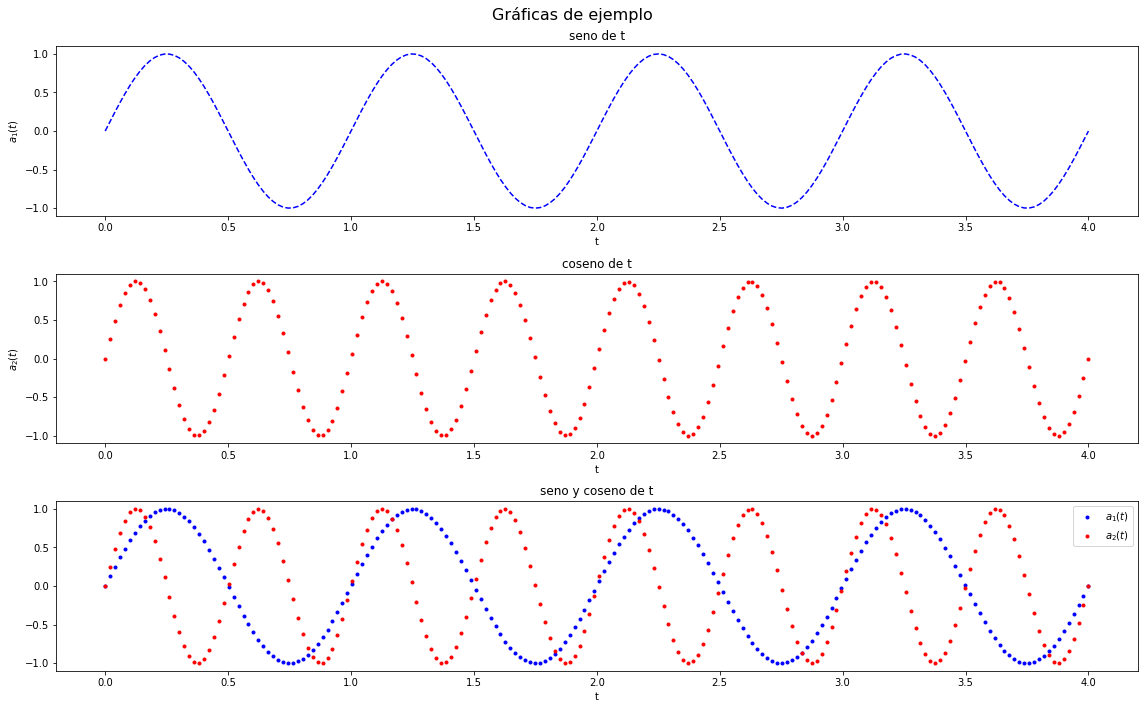

In [5]:
t = np.linspace(0.0, 4.0, 200)
a1 = np.sin(2*np.pi*t)
a2 = np.sin(4*np.pi*t)

fig, ax = plt.subplots(3, 1, figsize=(16,10))

fig.suptitle('Gráficas de ejemplo', fontsize=16)

ax[0].set_title('seno de t')
ax[0].plot(t,a1, 'b--')
ax[0].set_xlabel('t')
ax[0].set_ylabel('$a_1(t)$')

ax[1].plot(t,a2, 'r.')
ax[1].set_title('coseno de t')
ax[1].set_xlabel('t')
ax[1].set_ylabel('$a_2(t)$')

ax[2].scatter(t,a1, c = 'b', marker = '.', label = '$a_1(t)$')
ax[2].scatter(t,a2, color = 'r', marker = '.', label = '$a_2(t)$')
ax[2].set_title('seno y coseno de t')
ax[2].set_xlabel('t')
ax[2].legend()

plt.tight_layout()
plt.show()

Si quieres hacer un sólo gráfico en vez de dos, la cosa se simplifica. Fíjate bien en cómo usar los comandos por si tienes que reutilizar ese código.

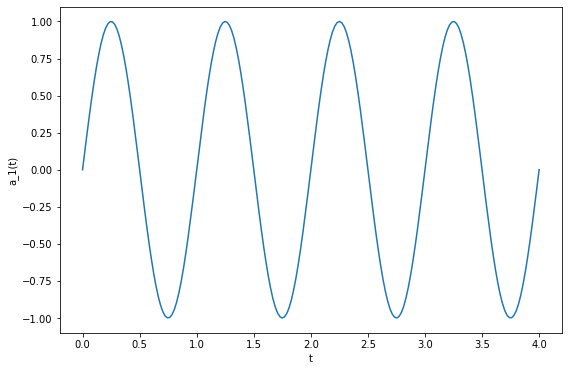

In [6]:
plt.figure()
plt.plot(t, a1)
plt.xlabel('t')
plt.ylabel('a_1(t)')
plt.show()

También podemos realizar nubes de puntos o scatter plots, de la siguiente manera.

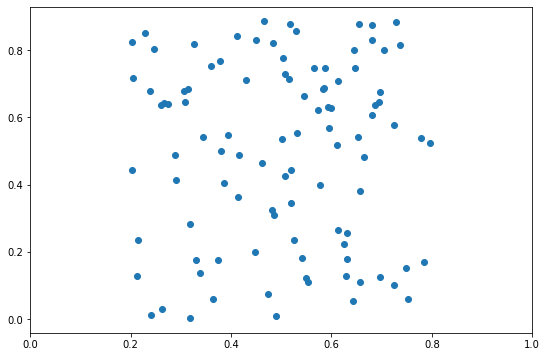

In [7]:
N = 100
x = 0.6 * np.random.rand(N)+0.2
y = 0.9 * np.random.rand(N)
plt.scatter(x, y)
plt.xlim(0, 1)
plt.show()

### 1.1 Mínimo de una función

En el siguiente ejemplo tenemos la siguiente función:

$c(w) = w^2-w+2$

Si queremos obtener su mínimo con respecto a w, caculamos la derivada con respecto a esa variable e igualamos a cero:

$\frac{dc(w)}{dw}=0$

Si caculamos y despejamos, esto nos daría la solución...

$2w-1=0, w=0.5$

Es decir, el mínimo de dicha función está en 0.5.

Vamos a dibujar dicha curva. Fíjate bien en la primera línea de código. Es muy habitual tener que definir el eje X con un conjunto de valores donde vamos a evaluar la función que queremos pintar. Piensa que para dibujar un determinado gráfico correspondiente a una curva o función necesitamos coordenadas o pares (x, y).

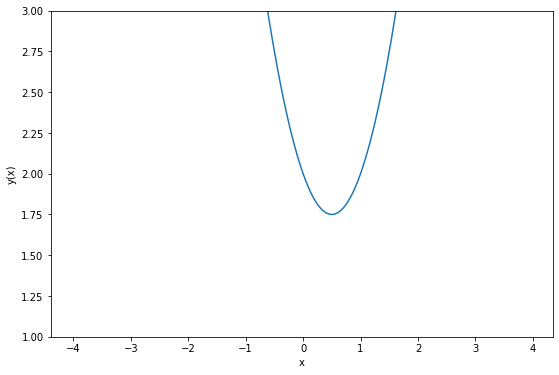

In [8]:
x = np.arange(-4.0, 4.0, 0.05) #del -4 al 4 cada 0.05
y = x**2-x+2


plt.figure()
plt.plot(x, y)
plt.ylim((1, 3))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

> **Ejercicio**: puedes imaginar que esta función es una función de pérdidas de algún modelo de aprendizaje automático que queremos minimizar. Ahora sabemos que el valor de 0.5 es el valor de w que la minimiza. Esta w, podría referirse a un parámetro de mi modelo que minimiza la función de pérdidas. Calcula a continuación el valor de las pérdidas. Además, vuelve a realizar la misma gráfica añadiendo un punto rojo en el mínimo.

In [ ]:
# <SOL>
min = 0.5
w = np.arange(-4.0, 4.0, 0.05)
c = lambda w: w**2 - w + 2 #funcion de pérdidas al clacularle el mínimo, que es el valor esperado


plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.plot(min, c(min), c = 'r', marker = '*', markersize=600)
plt.ylim((1, 3))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

# <SOL>

## 2. Ejemplo de dataset para regresión

El objetivo de los modelos de regresión es predecir el valor de cierta variable objetivo (variable de salida) $Y$ a partir de la observación de una o más variables de *entrada* $X_1, X_2, \ldots, X_N$ (que almacenaremos en una única matriz $\bf X$).

Los problemas de regresión surgen de problemas donde el valor de la variable objetivo no es accesible de forma fácil, pero podemos medir otras variables dependientes a partir de las cuales podemos intentar predecir $Y$.  

### 2.1. Cargando los datos a partir de la librería de scikit-learn

El paquete de <a href=http://scikit-learn.org/>scikit-learn</a> contiene varios <a href=https://scikit-learn.org/stable/datasets.html#datasets> datasets</a> relacionados con problemas de regresión. 

* Dataset Boston: La variable objetivo contiene precios de casas en diferentes barrios de Boston. El objetivo es predecir dichos valores en base a variables sociales, económicas y demográficas tomadas en cada zona.


* <a href=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes /> Diabetes dataset</a>.

Puedes cargar alguno de ambos dataset con las siguientes líneas de código:

In [ ]:
# Carga el dataset. Seleccionalo comentando la linea apropiada
#D = datasets.load_boston()
D = datasets.load_diabetes() # <-- Esto viene de  la librería sklearn

# Extrae los datos y los parámetros
X = D.data         # Matriz completa de datos (incluyendo variables de entrada y salida)
Y = D.target       # Variables de salida
n_muestras = X.shape[0] # Número de observaciones (filas)
n_variables = X.shape[1]    # Número ode variables (incluyendo variables de entrada y salida) (columnas)

El dataset contiene

In [ ]:
print(n_muestras)

442


observaciones con sus variables objetivo y

In [ ]:
print(n_variables)

10


variables de entrada.

Las dimensiones de Y son:

In [ ]:
Y.shape
np.ndim(Y)

1

Las dimensiones de X son:

In [ ]:
X.shape

(442, 10)

In [ ]:
'''
Y[:, np.newaxis].shape #si queremos añadirle una dimension más para operaciones
np.ndim(Y[:, np.newaxis])
'''

### 2.2. Visualización de gráficos de dispersión (*scatter plots*)

Cuando las entradas del dataset son multidimensionales, no se pueden visualizar directamente, pero podemos hacernos una idea sobre la tarea de regresión si representamos la variable de salida con respecto a cada una de las variables de entrada. Estas representaciones se conocen como *scatter plots*.

Los métodos de Python `plot` y `scatter` de la librería `matplotlib` se pueden usar para dichas representaciones gráficas. 

`Código rechulón para hacer suplots en bucle`

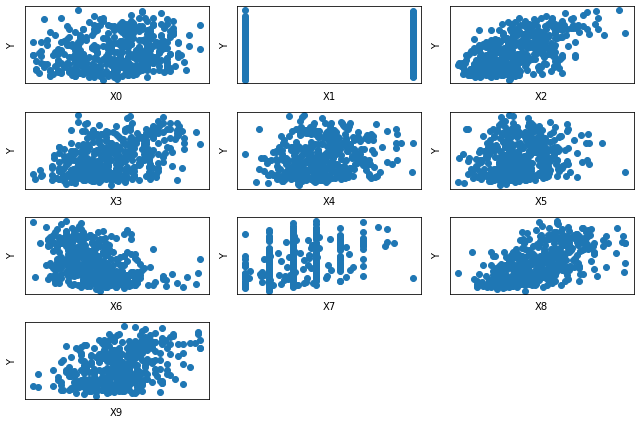

In [ ]:
# Selecciona la disposición de los gráficos
nfilas = 4 #numero de filas de la subplot que creamos
ncolumnas = 1 + int((X.shape[1]-1)/nfilas) #numero de columnas, que se tiene que ajustar al numero de filas de esta forma


# Algunos ajustes para el subplot.
pylab.subplots_adjust(hspace=0.2)

# Dibujas todas las variables
for idx in range(X.shape[1]): # <-- idx recorre el número de columnas, range para no salirse del índice 0 a 9
    ax = plt.subplot(nfilas, ncolumnas, idx+1)
    ax.scatter(X[:, idx], Y)    # <-- Este es el comando importante, cojo diferentes columnas en cada iteración
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.ylabel('Y')
    plt.xlabel('X' + str(idx))

plt.tight_layout() # <-- Pa que se vea bien ajustado

### 2.3. Gráficos 3D

Con la adición de una tercera coordenada, `plot` y `scatter` se pueden usar para gráficos en 3D.

> **Ejercicio**: Selecciona el dataset de `diabetes`. Visualiza la variable objetivo con respecto a las variables 2 y 4 (teniendo en cuenta que las variables van de la 0 a la 9) `La columna 3 y 5`. Puedes obtener más información sobre el comando <a href=http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter>scatter</a> y un <a href=http://matplotlib.org/examples/mplot3d/scatter3d_demo.html>ejemplo de uso</a> en la documentación de <a href=http://matplotlib.org/index.html> matplotlib</a>.

> Primero, guarda en x2 y x4 dichas variables. 

Luego, el código crea una figura y añade un subplot de 3D. Hace el scatter y añade etiquetas a los 3 ejes de la gráficas

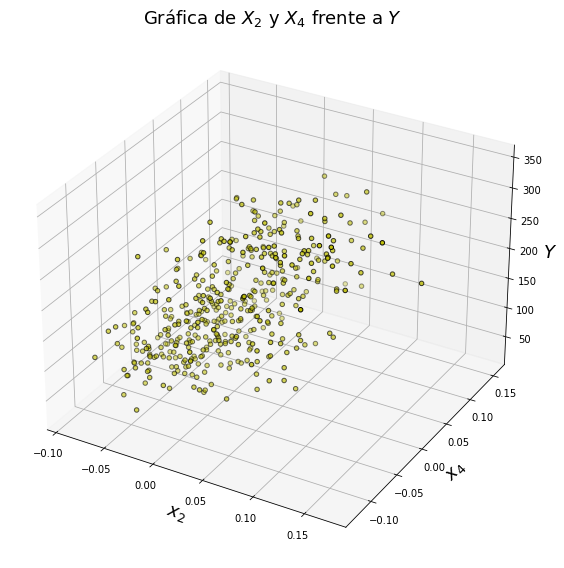

In [ ]:

x2 = X[:, 2] # <SOL>
x4 = X[:, 4]# <SOL>

fig = plt.figure(figsize=(10,8)) #<-- Creamos la figura
ax = fig.add_subplot(111, projection='3d') #<-- Crear la proyección en 3D

ax.scatter(x2, x4, Y, zdir=u'z', s=20, c=u'y', marker='o', edgecolor='k', depthshade=True) #<-- sile quitamos la u no pasa nada?

ax.set_xlabel('$x_2$', size=18)
ax.set_ylabel('$x_4$', size=18)
ax.set_zlabel('$Y$', size=18)

plt.title('Gráfica de $X_2$ y $X_4$ frente a $Y$', size=18)
plt.tight_layout()
plt.show()


### 2.4. Evaluando una tarea de regresión

Para evaluar el rendimiento de un predictor dado, necesitamos cuantificar la calidad de las predicciones. Esto es usualmente hecho por medio de una función de pérdidas, $l(y,\hat{y})$. Dos funciones de pérdidas usuales son:

   - Error cuadrático: $l(y, \hat{y}) = (y - \hat{y})^2$
   - Error absoluto: $l(y, \hat{y}) = |y - \hat{y}|$

Ten en cuenta de que ambos errores, cuadrático y absoluto, son funciones del error de la estimación, $e = y-{\hat y}$. Sin embargo, esto no es necesariamente siempre así. Imagina una situación en la cual nos gustaría introducir una penalización que aumenta con la magnitud de la variable estimada. Para tal caso, la siguiente función de coste sería un mejor ajuste a nuestras necesidades: $l(y,{\hat y}) = y^2 \left(y-{\hat y}\right)^2$.

En primer lugar vamos a representar gráficamente ambas funciones de pérdidas, basadas en el error cuadrático y absoluto.

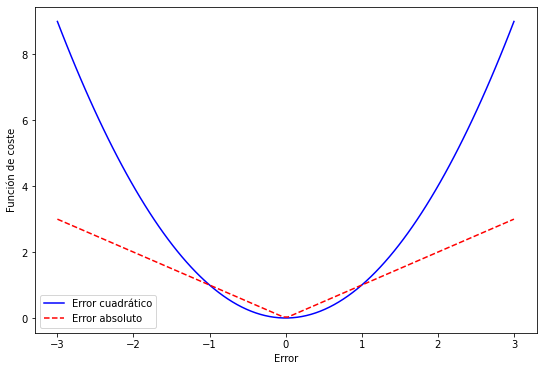

In [ ]:
grid = np.linspace(-3,3,num=100)
plt.plot(grid, grid**2, 'b-', label='Error cuadrático')
plt.plot(grid, np.absolute(grid), 'r--', label='Error absoluto')
plt.xlabel('Error')
plt.ylabel('Función de coste')
plt.legend(loc='best')

La forma de evaluar el rendimiento del modelo es a través del valor total de la función de pérdidas, ${\bar R}$, que se calcula como la media de dicha función en un conjunto de datos:

$${\bar R} = \frac{1}{N}\sum_{n=1}^N l\left(y^{(n)}, \hat{y}^{(n)}\right)$$

siendo N el tamaño del conjunto de datos.

##### **Ejercicio**:

El dataset del archivo `'x01.csv'`, tomado de <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">aquí</a> recoge la media del peso del cerebro y el cuerpo de una serie de especies de mamíferos.
* Representa un gráfico disperso de la variable objetivo con respecto a la entrada de una dimensión.
* Representa, sobre el mismo gráfico, la función de predicción dada por la ecuación $Y = 1.2 X$
* Calcula la tasa del error cuadrático para el dataset dado. 

Cargamos primero el dataset en los arrays X y Y

In [ ]:
df = pd.read_csv('x01.csv', sep=',', header=None)
X = df.values[:, 0]
Y = df.values[:, 1]

print(X.shape)
print(Y.shape)

(62,)
(62,)


Ploteamos tanto la dispersión de los datos como la recta de ajuste y la predicción de los datos esperada

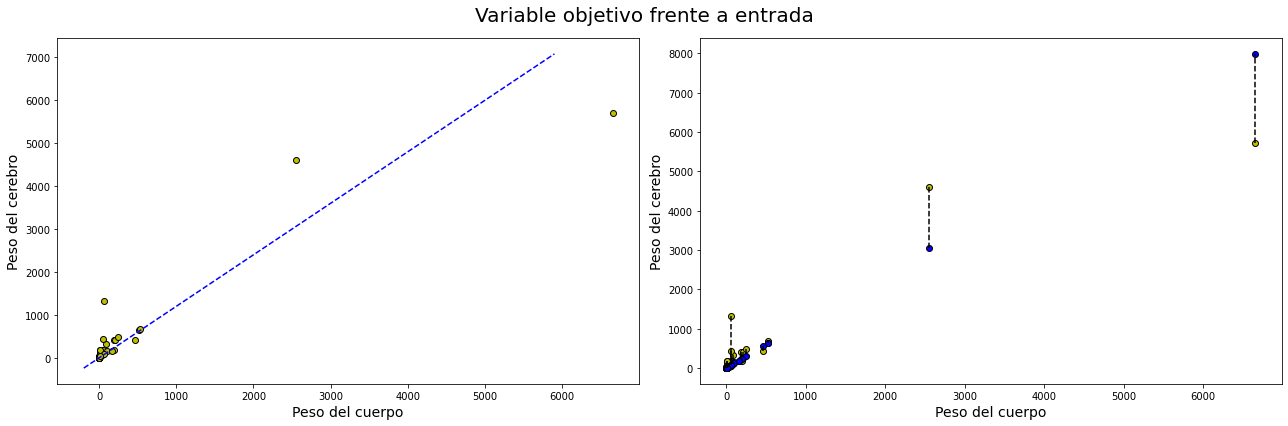


El Mean Squared Error vale 153781.94


In [ ]:
# <SOL>
fprediccion = lambda x: 1.2*x #<-- función de predición
rango = np.arange(-200, 6000, 100) #<-- rango para plotear la salida

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6)) # <-- creo las dos gráficas ax y la figura fig
fig.suptitle('Variable objetivo frente a entrada', size=20) #<-- fijo el título de la gráfica

ax1.scatter(X, Y, c='y', marker='o', edgecolor='k') #<-- primera gráfica con la recta de regresión
ax1.plot(rango, fprediccion(rango), 'b--')
ax1.set_xlabel('Peso del cuerpo', size=14)
ax1.set_ylabel('Peso del cerebro', size=14)
ax2.scatter(X, Y, c='y', marker='o', edgecolor='k') #<-- segunda gráfica con los puntos de la predicción
ax2.scatter(X, fprediccion(X), c='b', marker='o', edgecolor='k')
ax2.set_xlabel('Peso del cuerpo', size=14)
ax2.set_ylabel('Peso del cerebro', size=14)

for i, x in enumerate(Y): # <-- Para graficar las distancias entre puntos
  x_values = [X[i], X[i]]
  y_values = [Y[i], fprediccion(X[i])]
  ax2.plot(x_values, y_values, 'k--')


plt.tight_layout()
plt.show()

MSE = sum([(Y[i] - fprediccion(X[i]))**2 for i, x in enumerate(X)])/len(Y) #<-- cálculo del MSE
print(f'\nEl Mean Squared Error vale {round(MSE,2)}')

#MSE = np.mean((Y-fprediccion(X))**2) es la forma sin almacenar las distancias en una lista
# </SOL>


Uso el código de abajo para crear las rectas entre puntos. El valor de $x$ tanto para la predicción como para el dato original es el mismo. Simplemento creo un par de puntos con los dos valores para la $x$ iguales y después el par de valores para la $y$, el dato original y la predicción. Al plotear indico `linestyle = '--'`. 

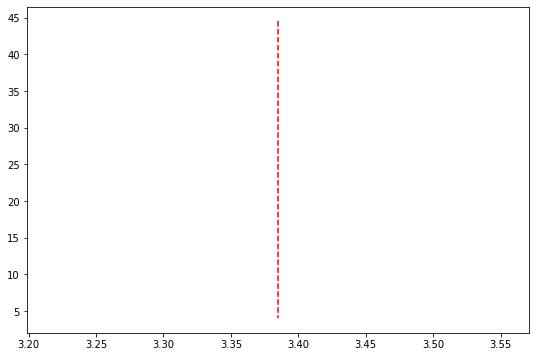

In [ ]:
'''PARA TODOS LOS PUNTOS
for i, x in enumerate(Y): # <-- Para graficar las distancias entre puntos
  x_values = [X[i], X[i]]
  y_values = [Y[i], fprediccion(X[i])]
  ax2.plot(x_values, y_values, 'k--')
'''
x_values = [X[0], X[0]]
y_values = [Y[0], fprediccion(X[0])]
plt.plot(x_values, y_values, 'r--')
plt.show()

### 2.5. Conjuntos de entrenamiento y test
El principal objetivo de un modelo de regresión es que sea capaz de hacer buenas predicciones para nuevas muestras arbitrarias, no cogidas del dataset usado para el entrenamiento del algoritmo de regresión.

Entonces, para evaluar la precisión de un algoritmo de regresión, necesitamos algunos datos no usados durante el diseño del predictor para *testear* el rendimiento del modelo ante nuevos datos. Para ello, el dataset original se suele dividir en (al menos) dos conjuntos disjuntos:

* **Conjunto de entrenamiento**, $D_{\text{train}}$: Usado por el algoritmo de regresión para determinar el predictor $f$.
* **Conjunto de test**, $D_{\text{test}}$: Usado para evaluar el rendimiento del algoritmo de regresión.

Un buen algoritmo de regresión usa $D_{\text{train}}$ para obtener un predictor con bajo error medio basado en $D_{\text{test}}$
$$
{\bar R}_{\text{test}} = \frac{1}{N_{\text{test}}} 
\sum_{  ({\bf x},y) \in D_{\text{test}}} l(y, f({\bf x}))
$$
donde $N_{\text{test}}$ es el tamaño del conjunto de test.

## 3. Ejemplo de dataset para clasificación

Uno de los principales problemas de Machine Learning es la clasificación. En el siguiente ejemplo, cargaremos y visualizaremos un dataset que se puede usar en un problema de clasificación.


El [dataset iris](https://archive.ics.uci.edu/ml/datasets/Iris) es el más popular en reconocimiento de patrones (pattern recognition). Consiste en 150 observaciones de 4 características/features de flores iris:

1. Longitud de sépalo en cm
2. Ancho de sépalo en cm
3. Longitud de pétalo en cm
4. Ancho de pétalo en cm

El objetivo es normalmente distinguir 3 clases diferentes de la planta iris: Iris setosa, Iris versicolor y Iris virginica.

### 3.1 Cargando los datos a partir de un archivo csv

Te damos los datos en formato _.csv_. En cada línea del archivo csv, tenemos 4 características de valor real y luego un string que define la clase de la entrada: Iris-setosa, Iris-versicolor o Iris-virginica. Hay 150 observaciones de flores (lineas->filas) en el archivo csv. 

Veamos cómo podemos cargar los datos en un _array_.

In [ ]:
# Abrimos el archivo csv en un objeto de Python.
csv_file_object = csv.reader(open('iris_data.csv', 'r')) ## <-- usamos la librería csv, import csv
datalist = []                    # Creamos una variable llamada 'data'.
for row in csv_file_object:      # Recorremos cada fila en el archivo csv,
    datalist.append(row)         # Añadimos cada fila a la variable data


data = np.array(datalist)  # Convertimos de una lista a un array
                           # Ten en cuenta de que cada item es un string en este formato
print(np.shape(data))

X = data[:, 0:-1].astype(float) #<-- covierto todas las columas desde la primera a la ultima a tipo float
Y = data[:, -1, np.newaxis] # <-- añado la dimension con np.newaxis para no tener problemas al operar matrices

print(X.shape) # comprobamos la forma de nuestros datos
print(Y.shape)


(150, 5)
(150, 4)
(150, 1)


En el código anterior, hemos guardado las características en la matriz _X_ y la etiqueta de la clase en el vector Y. Ambos son _numpy_ _arrays_ de 2D.
También estamos mostrando los tamaños de cada variable (mira que también podemos usar *array_name.shape* para obtener el tamaño, aparte de la función _shape( )_). Esta comprobación está bien para ver que no estamos cometiendo errores.

### 3.2 Visualizando los datos

> **Ejercicio**:
Extrae las primeras dos características de los datos (longitud y ancho de sépalo) y dibuja la primera contra la segunda en una figura. Usa diferentes colores para los datos correspondientes a diferentes clases.


> Lo primero de todo quizás quieras dividir los datos de acuerdo a la etiqueta de cada clase. Puedes usar `np.where()`.

> Escribe también los nombres en cada eje en la gráfica.


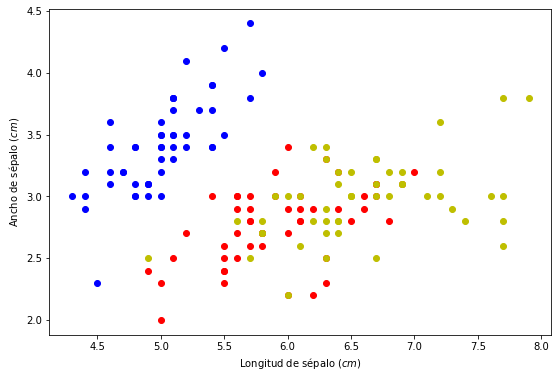

In [ ]:
#<SOL> ETIQUETANDO LAS CLASES Y GRAFICANDO LOS COLORES
longitud = X[:, 0]
ancho = X[:, 1]

for i, x in enumerate(Y):
  if Y[i] == 'Iris-setosa':
    plt.scatter(longitud[i], ancho[i], color='b')
  elif Y[i] == 'Iris-versicolor':
    plt.scatter(longitud[i], ancho[i], color='r')
  else:
    plt.scatter(longitud[i], ancho[i], color='y')

plt.xlabel('Longitud de sépalo $(cm)$')
plt.ylabel('Ancho de sépalo $(cm)$')
plt.show()
#<SOL>

Esta es la primera forma, implica menos código, no crear listas vacías pero al graficar punto por punto tarda más y no es posible mostrar una leyenda de datos.

La segunda manera, sería crear listas vacias de longitud y ancho para cada especie de flor e ir rellenandolas a medida que cumplan la colndición establecida. Finalmente, graficamos tres nubes de puntos diferentes para cada especie de flor.

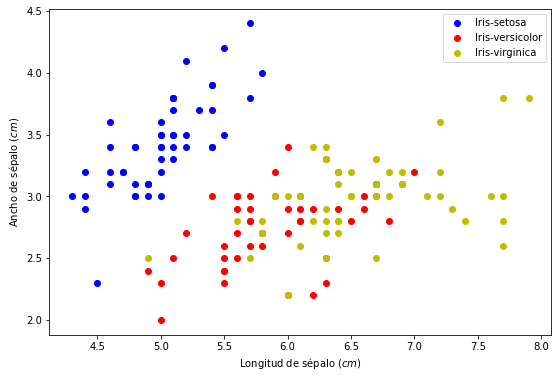

In [ ]:
longitud = X[:, 0]
ancho = X[:, 1]

l1 = []; a1 = [];
l2 = []; a2 = [];
l3 = []; a3 = [];

for i, y in enumerate(Y):
  if y == 'Iris-setosa':
    l1.append(longitud[i])
    a1.append(ancho[i])
  elif y == 'Iris-versicolor':
    l2.append(longitud[i])
    a2.append(ancho[i])
  else:
    l3.append(longitud[i])
    a3.append(ancho[i])

plt.scatter(l1, a1, c='b', label='Iris-setosa') # <-- ploteamos por separado y pintamos de cada color
plt.scatter(l2, a2, c='r', label='Iris-versicolor')
plt.scatter(l3, a3, c='y', label='Iris-virginica')
plt.xlabel('Longitud de sépalo $(cm)$')


plt.xlabel('Longitud de sépalo $(cm)$')
plt.ylabel('Ancho de sépalo $(cm)$')
plt.legend()
plt.show()

Una última forma pa aburrir, sin crear listas vacias

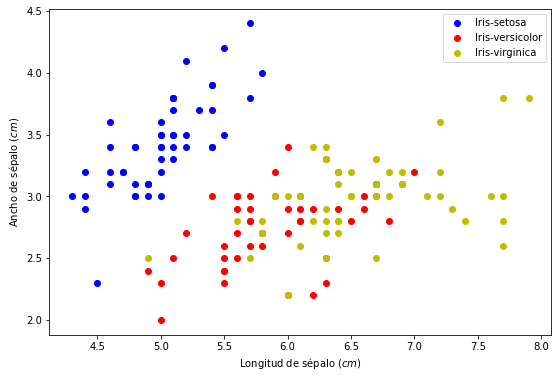

In [ ]:
longitud = X[:, 0]
ancho = X[:, 1]

l1 = [longitud[i] for i, y in enumerate(Y) if y == 'Iris-setosa']
a1 = [ancho[i] for i, y in enumerate(Y) if y == 'Iris-setosa']
l2 = [longitud[i] for i, y in enumerate(Y) if y == 'Iris-versicolor']
a2 = [ancho[i] for i, y in enumerate(Y) if y == 'Iris-versicolor'];
l3 = [longitud[i] for i, y in enumerate(Y) if y == 'Iris-virginica']
a3 = [ancho[i] for i, y in enumerate(Y) if y == 'Iris-virginica']

longitudes = [l1, l2, l3]
anchos = [a1, a2, a3]
leyendas = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colores = ['b', 'r', 'y']

for i, largo in enumerate(longitudes):
  plt.scatter(largo, anchos[i], color=colores[i], label=leyendas[i])

plt.xlabel('Longitud de sépalo $(cm)$')
plt.xlabel('Longitud de sépalo $(cm)$')
plt.ylabel('Ancho de sépalo $(cm)$')
plt.legend()
plt.show()

`LA MANERA DE AURORA` implica usar la función [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html) para que nos dé los indices de las filas dónde se cumplan las condiciones y graficar igual que en el ejemplo anterior

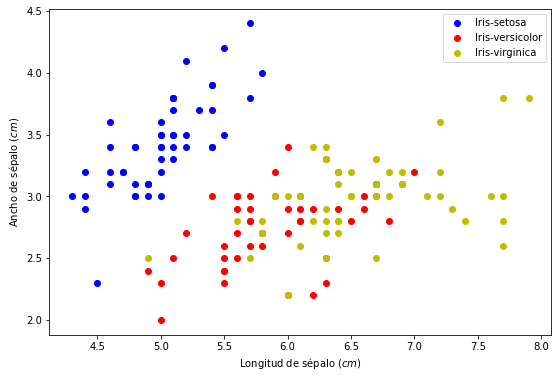

In [ ]:
# LA FORMA DE AURORA ES CREAR UNA LISTA DE CONDICIONALES Y COGIENDO DESPUES ESA FILAS
filas_c1 = np.where(Y == 'Iris-setosa')[0] # <-- Devuelve los índices de las filas dónde se cumple la condición
filas_c2 = np.where(Y == 'Iris-versicolor')[0] 
filas_c3 = np.where(Y == 'Iris-virginica')[0]

v1 = X[filas_c1, :] #<-- coge todas las columnas de las filas con los índices dónde se cumplia la condición
v2 = X[filas_c2, :]
v3 = X[filas_c3, :]

plt.scatter(v1[:, 0], v1[:, 1], c='b', label='Iris-setosa') # <-- ploteamos por separado y pintamos de cada color
plt.scatter(v2[:, 0], v2[:, 1], c='r', label='Iris-versicolor')
plt.scatter(v3[:, 0], v3[:, 1], c='y', label='Iris-virginica')
plt.xlabel('Longitud de sépalo $(cm)$')
plt.ylabel('Ancho de sépalo $(cm)$')
plt.legend()
plt.show()

> **Ejercicio**: De acuerdo a esta figura, ¿qué clases son más difícil de distinguir?


## 4. Ejemplo completo de predicción en un modelo de regresión

Ahora que sabemos cómo cargar algunos datos y visualizarlos, intentaremos resolver una tarea de regresión.

Nuestro objetivo en este ejemplo es predecir las tasas de crimen en diferentes áreas de Estados Unidos usando datos socio-demográficos.

Este dataset tiene 127 variable socioeconómicas, de diferente naturaleza: categóricas, enteros, reales, y para algunos de ellos también hay datos perdidos ([comprueba wikipedia](https://en.wikipedia.org/wiki/Missing_data)). Esto es normalemente un problema cuando entrenamos modelos de machine learning, pero ignoraremos dicho problema por ahora y cogeremos un pequeño número de variables que creemos que pueden ser útiles para regresión y que no tengan valores perdidos. 

* population: población por comunidad
* householdsize: media de personas por casa
* medIncome: mediana de los ingresos

El objetivo en el problema de regresión es otro valor real que contiene el *número total de crímenes violentos por 100K de población*.

### 4.1 Cargando los datos


> **Ejercicio**:  Lo primero de todo, carga los datos del fichero _communities.csv_ en un nuevo array. Este array debería tener 1994 filas (entradas) y 128 columnas.



In [ ]:
data = pd.read_csv('communities.csv', sep=',', header=None)
pd.options.display.max_columns = None
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


**Ejercicio**: Toma las columnas (5, 6, 17) de los datos y guárdalas en una matriz *X_com*. Estos serán nuestros datos de entrada. Convierte este array en un array de _float_ con el parámetro _dtype_ al convertir a array de numpy. El tamaño debería ser (1994, 3).


In [ ]:
X_com = data[[5, 6, 17]] 
X_com.convert_dtypes()
print(X_com.info())
X_com = np.array(X_com)
print(X_com.shape)

#data = data.values[: , :]
#X_com = data[:, (5, 6, 17)]
#y_com = data[:, -1, np.newaxis]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       1994 non-null   float64
 1   6       1994 non-null   float64
 2   17      1994 non-null   float64
dtypes: float64(3)
memory usage: 46.9 KB
None
(1994, 3)


**Ejercicio**: Toma la última columna de los datos y guárdala en un array llamado *y_com*. Convierte esta matriz en un array de _float_.
Comprueba que la forma es (1994, 1). En caso de que no, usa np.newaxis para obtener las dimensiones que queremos.

In [ ]:
y_com = data[[127]]
y_com.convert_dtypes()
y_com.info()
y_com = np.array(y_com) 
print(y_com.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   127     1994 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB
(1994, 1)


### 4.2 Visualización de los datos

**Ejercicio**: Dibuja cada variable en *X_com* versus *y_com* para tener una primera (parcial) visión de los datos. Puedes usar plots normales o subplots, como prefieras.

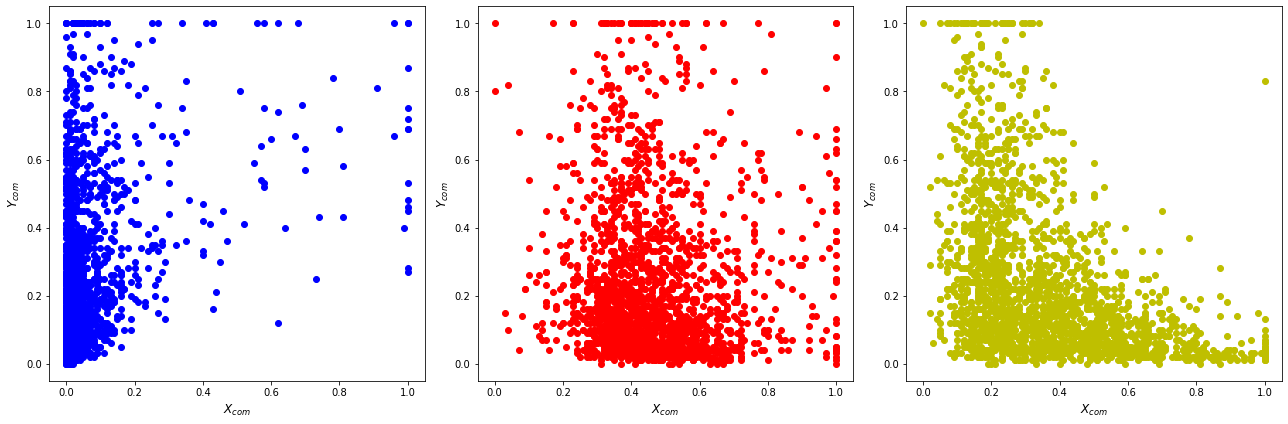

In [ ]:
#<SOL>
nfilas = 1
ncolumnas = X_com.shape[1] # <-- deberían ser 3 sólo

fig, ax = plt.subplots(1, ncolumnas, figsize=(18, 6))
colors = ['b', 'r', 'y']

for i in range(ncolumnas):
    ax[i].scatter(X_com[:, i], y_com[:, 0], color=colors[i])
    ax[i].set_xlabel('$X_{com}$', size=12)
    ax[i].set_ylabel('$Y_{com}$', size=12)

plt.tight_layout()
plt.show()
#</SOL>

### 4.3 División Train/Test

Ahora vamos a empezar a hacer machine learning. Pero antes tenemos que separar los datos entre entrenamiento y test.

Los datos de entrenamiento se usarán para ajustar los parámetros del modelo (entrenar).
Los datos de test se usarán para evaluar el modelo.

**Ejercicio**: Usa *sklearn.model_selection.train_test_split* para dividir los datos en *entrenamiento* (60%) y *test* (40%). Guarda los resultados en variables llamadas *X_train*, *X_test*, *y_train*, *y_test*.

In [ ]:
#<SOL> DIVISION DE LOS DATOS
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X_com, y_com, test_size=0.4) # <-- para dividir la muestra en entrenamiento y test al 40%

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#</SOL>

(1196, 3)
(798, 3)
(1196, 1)
(798, 1)


### 4.4  Normalización

La mayoría de algoritmos de machine learning requieren que los datos estén normalizados (media=0, desviación estándar=1). 

> **Ejercicio**: Normaliza los datos anteriores. Scikit-learn porporciona una herramienta para hacer esto en el objeto  `sklearn.preprocessing.StandardScaler` (pero también puedes intentar programarlo por ti mism@!)

In [ ]:
#<SOL> NORMALIZACIÓN DE LOS DATOS
#help(StandardScaler) 

scaler = StandardScaler().fit(X_train) # <-- SIEMPRE SE NORMALIZA CON LOS ESTADÍSTICOS DE ENTRENAMIENTO

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#</SOL>

### 4.5 Entrenamiento y predicción

A continuación vamos a entrenar un modelo de regresión llamado KNN. Por ahora no hace falta que sepamos nada del modelo, ya lo veremos más adelante. Sólo quiero que os quedéis con la manera de entrenar un modelo y predecir los datos de test, pues será similar en todos los modelos de Scikit-learn.

> **Ejercicio**: Entrena dos regresores K-NN diferentes para este ejemplo. Uno con K (*n_neighbors*) = 1 y el otro con K=7. Luego, predice las salidas en los datos de test.

> Lee la [API](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) y [este ejemplo](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#example-neighbors-plot-regression-py) para entender como ajustar el modelo.

In [ ]:
#<SOL>
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X_train, y_train)
y_est_test = knn1.predict(X_test)
y_est_train = knn1.predict(X_train)

knn7 = KNeighborsRegressor(n_neighbors=7)
knn7.fit(X_train, y_train)
y_est_test7 = knn7.predict(X_test)
y_est_train7 = knn7.predict(X_train)


#</SOL>

### 4.6 Evaluación de la función de pérdidas


La fórmula del MSE es

$$\text{MSE}=\frac{1}{N}\sum_{n=1}^{N}(\hat{y}-y)^2$$

> **Ejercicio**:  Ahora usa los dos modelos que has entrenado para predecir la salida de test *y_test*. Luego evalualo midiendo el error cuadrático medio / Mean-Square Error (MSE).

In [ ]:
#<SOL>

mse1 = np.mean((y_est_test - y_test)**2)
mse2 = np.mean((y_est_test7 - y_test)**2)
#</SOL>
print(mse1)
print(mse2) # <-- Mejor método

0.06735213032581454
0.033206687637461


> **Ejercicio**: ¿Cuál es mejor modelo?

### 4.7 Guardando los resultados 

Finalmente guardaremos nuestras predicciones para el modelo con K=1 en un archivo csv. Para hacer eso podría usar el siguiente código Snippet, donde *y_pred* son los valores de predicción de salida para test.

In [ ]:
# Esto es una celda de ejemplo, no tienes que ejecutarla.
y_pred = y_pred.squeeze()
f = open('output.csv', 'w')
writer = csv.writer(f)
for index, y_aux in enumerate(y_pred):      # Recorrer cada fila del documento
    writer.writerow([index,y_aux]) 
f.close()

> **Ejercicio**: Reutiliza el código anterior para guardar una de las dos salidas de tus modelos anteriores.

In [ ]:
#<SOL>

#</SOL>